In [8]:
import pandas as pd
from pandas import DataFrame
import sodapy as sd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas_bokeh as pbk
pbk.output_notebook()
import geopandas
import seaborn as sns

Loading BokehJS ...

In [9]:
from sodapy import Socrata

client = Socrata("analisi.transparenciacatalunya.cat", None)

results = client.get("rmgc-ncpb", limit=16774)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [10]:
# Tenim en la columnna 'dat' el dia i l'hora juntes, volem separar-les en dues noves columnes 'data' i 'hora'
dist_morts=df[["dat","f_morts"]]
# Canviem la T que separa dia i hora per identificar la separació dues vegades: amb ' ' i amb '-'
df['dat'] = df['dat'].str.replace('T',' ')
df[['data','hora']] = df["dat"].str.split(" ", 1, expand=True)
df['data']=df['data'].astype("str")
df["hora"] = df["hora"].str.strip(" ")

df[['any','mesos','dies']] = df["data"].str.split("-", 2, expand=True)
df

,any,zona,dat,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,...,d_vent,grupdialab,hor,gruphor,tipacc,tipdia,data,hora,mesos,dies
0,2010,Zona urbana,2010-01-25 23:33:00.000,SE,999999,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij,2010-01-25,23:33:00.000,01,25
1,2010,Carretera,2010-10-31 01:00:00.000,N-240,999,LLEIDA,Segria,Lleida,0,1,...,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg,2010-10-31,01:00:00.000,10,31
2,2010,Carretera,2010-05-17 15:27:00.000,N-II,7087,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij,2010-05-17,15:27:00.000,05,17
3,2010,Zona urbana,2010-08-21 22:30:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,2,...,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis,2010-08-21,22:30:00.000,08,21
4,2010,Zona urbana,2010-05-07 17:45:00.000,SE,999999,BADALONA,Barcelones,Barcelona,0,1,...,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div,2010-05-07,17:45:00.000,05,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16769,2018,Zona urbana,2018-11-20 09:45:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,1,...,"Calma, vent molt suau",Feiners,945,Matí,Col.lisió de vehicles en marxa,dill-dij,2018-11-20,09:45:00.000,11,20
16770,2018,Carretera,2018-12-03 02:01:00.000,AP-7,173,CASTELLVI DE ROSANES,Baix Llobregat,Barcelona,0,1,...,"Calma, vent molt suau",Feiners,201,Nit,Col.lisió de vehicles en marxa,dill-dij,2018-12-03,02:01:00.000,12,03
16771,2018,Zona urbana,2018-09-30 21:19:00.000,SE,999999,"VENDRELL, EL",Baix Penedes,Tarragona,0,1,...,"Calma, vent molt suau",CapDeSetmana,2119,Tarda,Col.lisió d'un vehicle contra un obstacle de l...,dg,2018-09-30,21:19:00.000,09,30
16772,2018,Carretera,2018-04-04 10:53:00.000,SE,999999,VIVER I SERRATEIX,Bergueda,Barcelona,0,1,...,"Calma, vent molt suau",Feiners,1053,Matí,Bolcada a la calcada,dill-dij,2018-04-04,10:53:00.000,04,04


In [12]:
df_hor=df[["mesos"]]
# num d'accidents en funció de la comarca i ordenats alfabèticament respecte del nom de la comarca
accperhor = pd.value_counts(df_hor['mesos'])
accperhor = accperhor.to_frame() # convertir a Data Frame
accperhor.index.name = 'foo'
accperhor = accperhor.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor = accperhor.rename(columns={"mesos": "# accidents"}) # canviar els noms correctes
accperhor

,# accidents
foo,
01,1249
02,1177
03,1330
04,1356
05,1535
06,1544
07,1613
08,1384
09,1382


In [13]:
p_bar=accperhor.plot_bokeh.bar(ylabel='# Accidents', xlabel='Mes', title="Distr d'accidents per Mes",alpha=0.6)

In [18]:
# Volem representar un histograma on es vegin la quantitat d'acc per hora cada any
morts_cat=df[["any","dat","data","mesos","f_morts"]]
morts_cat.set_index("any", inplace=True)
morts_cat.head()

,dat,data,mesos,f_morts
any,,,,
2010,2010-01-25 23:33:00.000,2010-01-25,01,0
2010,2010-10-31 01:00:00.000,2010-10-31,10,0
2010,2010-05-17 15:27:00.000,2010-05-17,05,1
2010,2010-08-21 22:30:00.000,2010-08-21,08,0
2010,2010-05-07 17:45:00.000,2010-05-07,05,0


In [19]:
morts_cat10=morts_cat.loc[['2010']]
morts_cat11=morts_cat.loc[['2011']]
morts_cat12=morts_cat.loc[['2012']]
morts_cat13=morts_cat.loc[['2013']]
morts_cat14=morts_cat.loc[['2014']]
morts_cat15=morts_cat.loc[['2015']]
morts_cat16=morts_cat.loc[['2016']]
morts_cat17=morts_cat.loc[['2017']]
morts_cat18=morts_cat.loc[['2018']]
# num d'accidents en funció de la comarca i ordenats alfabèticament respecte del nom de la comarca
accperhor0 = pd.value_counts(morts_cat10['mesos'])
accperhor0 = accperhor0.to_frame() # convertir a Data Frame
accperhor0.index.name = 'foo'
accperhor0 = accperhor0.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor0 = accperhor0.rename(columns={"mesos": "# accidents10"}) # canviar els noms correctes
accperhor0.head()


,# accidents10
foo,
01,152
02,151
03,164
04,147
05,167


In [20]:
accperhor1 = pd.value_counts(morts_cat11['mesos'])
accperhor1 = accperhor1.to_frame() # convertir a Data Frame
accperhor1.index.name = 'foo'
accperhor1 = accperhor1.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor1 = accperhor1.rename(columns={"mesos": "# accidents11"}) # canviar els noms correctes
accperhor1.head()

,# accidents11
foo,
01,143
02,134
03,161
04,150
05,167


In [21]:
accperhor2 = pd.value_counts(morts_cat12['mesos'])
accperhor2 = accperhor2.to_frame() # convertir a Data Frame
accperhor2.index.name = 'foo'
accperhor2 = accperhor2.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor2 = accperhor2.rename(columns={"mesos": "# accidents12"}) # canviar els noms correctes
accperhor2.head()

,# accidents12
foo,
01,150
02,127
03,175
04,156
05,190


In [22]:
accperhor3 = pd.value_counts(morts_cat13['mesos'])
accperhor3 = accperhor3.to_frame() # convertir a Data Frame
accperhor3.index.name = 'foo'
accperhor3 = accperhor3.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor3 = accperhor3.rename(columns={"mesos": "# accidents13"}) # canviar els noms correctes
accperhor3.head()

,# accidents13
foo,
01,157
02,110
03,131
04,153
05,162


In [23]:
accperhor4 = pd.value_counts(morts_cat14['mesos'])
accperhor4 = accperhor4.to_frame() # convertir a Data Frame
accperhor4.index.name = 'foo'
accperhor4 = accperhor4.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor4 = accperhor4.rename(columns={"mesos": "# accidents14"}) # canviar els noms correctes
accperhor4.head()

,# accidents14
foo,
01,135
02,129
03,133
04,176
05,185


In [24]:
accperhor5 = pd.value_counts(morts_cat15['mesos'])
accperhor5 = accperhor5.to_frame() # convertir a Data Frame
accperhor5.index.name = 'foo'
accperhor5 = accperhor5.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor5 = accperhor5.rename(columns={"mesos": "# accidents15"}) # canviar els noms correctes
accperhor5.head()

,# accidents15
foo,
01,130
02,140
03,139
04,146
05,184


In [25]:
accperhor6 = pd.value_counts(morts_cat16['mesos'])
accperhor6 = accperhor6.to_frame() # convertir a Data Frame
accperhor6.index.name = 'foo'
accperhor6 = accperhor6.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor6 = accperhor6.rename(columns={"mesos": "# accidents16"}) # canviar els noms correctes
accperhor6.head()

,# accidents16
foo,
01,132
02,128
03,138
04,155
05,162


In [26]:
accperhor7 = pd.value_counts(morts_cat17['mesos'])
accperhor7 = accperhor7.to_frame() # convertir a Data Frame
accperhor7.index.name = 'foo'
accperhor7 = accperhor7.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor7 = accperhor7.rename(columns={"mesos": "# accidents17"}) # canviar els noms correctes
accperhor7.head()

,# accidents17
foo,
01,113
02,125
03,150
04,151
05,172


In [27]:
accperhor8 = pd.value_counts(morts_cat18['mesos'])
accperhor8 = accperhor8.to_frame() # convertir a Data Frame
accperhor8.index.name = 'foo'
accperhor8 = accperhor8.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor8 = accperhor8.rename(columns={"mesos": "# accidents18"}) # canviar els noms correctes
accperhor8.head()

,# accidents18
foo,
01,137
02,133
03,139
04,122
05,146


In [28]:
accperhora=pd.concat([accperhor0,accperhor1,accperhor2,accperhor3,accperhor4,accperhor5,accperhor6,accperhor7,accperhor8], axis=1)
accperhora["mitj"]=(accperhora["# accidents10"]+accperhora["# accidents11"]+accperhora["# accidents12"]+accperhora["# accidents13"]+accperhora["# accidents14"]+accperhora["# accidents15"]+accperhora["# accidents16"]+accperhora["# accidents17"]+accperhora["# accidents18"])/9
# accperhora["desv"]=(1/9)**(0.5)*((accperhora["# accidents10"]-accperhora["mitj"])**2+(accperhora["# accidents11"]-accperhora["mitj"])**2+(accperhora["# accidents12"]-accperhora["mitj"])**2+(accperhora["# accidents13"]-accperhora["mitj"])**2+(accperhora["# accidents14"]-accperhora["mitj"])**2+(accperhora["# accidents15"]-accperhora["mitj"])**2+(accperhora["# accidents16"]-accperhora["mitj"])**2+(accperhora["# accidents17"]-accperhora["mitj"])**2+(accperhora["# accidents18"]-accperhora["mitj"])**2)**(0.5)
# accperhora["max"]=accperhora.max(axis=1)
# accperhora["min"]=accperhora.min(axis=1)
# accperhorabox=accperhora[["mitj","desv","max","min"]]
accperhoratrans=accperhora.transpose()
accperhoratrans
mosinteresa=accperhora[["mitj"]]
mosinteresa

,mitj
foo,
01,138.777778
02,130.777778
03,147.777778
04,150.666667
05,170.555556
06,171.555556
07,179.222222
08,153.777778
09,153.555556


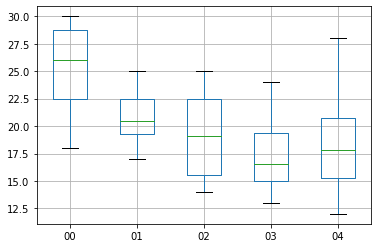

In [91]:
boxplot=accperhoratrans.boxplot(column=['00', '01', '02', '03', '04'])

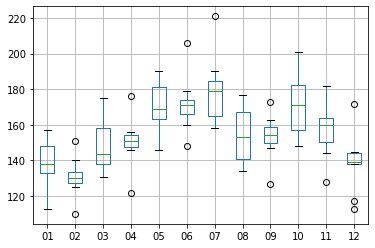

In [30]:
boxplot=accperhoratrans.boxplot(column=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

In [31]:
p_bar=accperhor.plot_bokeh.bar(ylabel='# Accidents', xlabel='Mes', title="Distr d'accidents per hora",alpha=0.6)

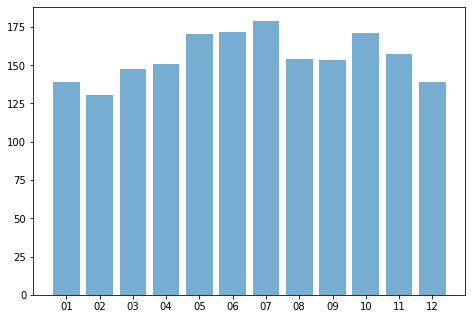

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang=(mosinteresa.index)
stud=mosinteresa["mitj"]
ax.bar(lang,stud,alpha=0.6)
plt.show()

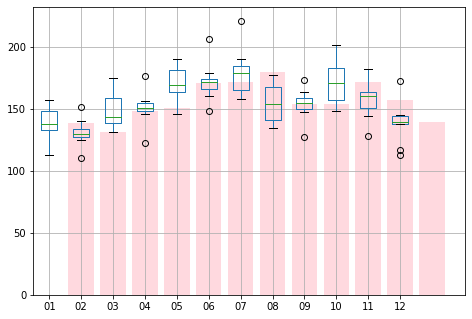

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang=(mosinteresa.index)
lang=lang.astype(int)
lang=lang+1
stud=mosinteresa["mitj"]
ax.bar(lang,stud,color='pink',alpha=0.6)
boxplot=accperhoratrans.boxplot(column=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
plt.show()

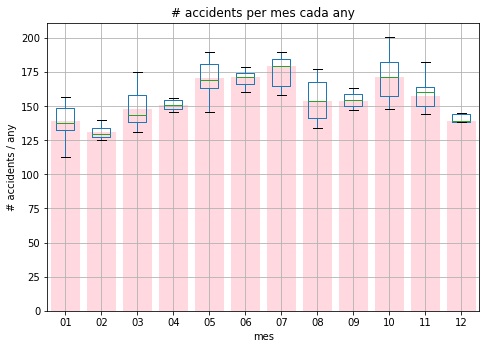

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang=(mosinteresa.index)
lang=lang.astype(int)

stud=mosinteresa["mitj"]
ax.bar(lang,stud,color='pink',alpha=0.6)
boxplot=accperhoratrans.boxplot(column=[ '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], showfliers=False)
plt.title('# accidents per mes cada any')
plt.xlabel('mes')
plt.ylabel('# accidents / any')

plt.show()
# boxplot shows the max value, min value and the median (min + (max-min)/2)